### Sales Analysis

**About**: This project analyses a sales dataset of various products to gain insights.

#### Imports and Dataframes

In [1]:
# Core Libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import os
import pandasql as ps
import seaborn as sns

# Visualization Libraries
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical data visualization

# For working with date and time
import datetime as dt

Here I joined multiple folders into one df

In [2]:
folder_path = 'SalesAnalysis\\Sales_Data'

# List all files in the folder (filter for specific file types if needed)
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create an empty list to store individual DataFrames
df_list = []

# Loop through each file and append to the list
for file in files:
    print(file)
    file_path = os.path.join(folder_path, file)  # Full file path
    df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### Cleaning data
To clean the data I...
- Removed Null Values
- Corrected Incorrect data types
- Used string manipulation to create a new column that contains only the city part in the address


In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


- Columns (2,3,4) are all the wrong data type
- There are null values in our data too. They must be removed.
- I'll remove null values first.

In [4]:
no_na_df = final_df.dropna()

In [5]:
no_na_df.info() # I can see null values were removed (186850 - 186305. about 500 rows removed)

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [6]:
# Change "Quantity Ordered" to INT, and "Price Each"
no_na_df["Quantity Ordered"] = pd.to_numeric(no_na_df["Quantity Ordered"],errors="coerce")

no_na_df["Price Each"] = pd.to_numeric(no_na_df["Price Each"],errors="coerce")

no_na_df['Order Date'] = pd.to_datetime(no_na_df['Order Date'], format='%m/%d/%y %H:%M', errors="coerce")


C:\Users\Josh\AppData\Local\Temp\ipykernel_9932\4029256762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_na_df["Quantity Ordered"] = pd.to_numeric(no_na_df["Quantity Ordered"],errors="coerce")
C:\Users\Josh\AppData\Local\Temp\ipykernel_9932\4029256762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_na_df["Price Each"] = pd.to_numeric(no_na_df["Price Each"],errors="coerce")
C:\Users\Josh\AppData\Local\Temp\ipykernel_9932\4029256762.py:6: SettingWithCopyWarning: 
A value is trying to be set on

In [7]:
no_na_df.info() # it was corrected.

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [8]:
# Function to extract the city from the address
def get_city(address):
    # Split the address by commas
    parts = address.split(',')
    # The city is typically the second element (index 1)
    if len(parts) > 1:
        return parts[1].strip()  # Strip leading/trailing spaces
    return None

# Apply the function to create a new 'city' column
no_na_df["City"] = no_na_df["Purchase Address"].apply(get_city)

C:\Users\Josh\AppData\Local\Temp\ipykernel_9932\3061381789.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_na_df["City"] = no_na_df["Purchase Address"].apply(get_city)


In [9]:
no_na_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles


# Analysis

#### 1) What month was the best for sales? How much was earned?
To answer I...
- Created a new column "month" that only contains month from "order date"
- Created a new column "total price" uses the product of "quantity ordered" and "price each"
- Used groupby and aggregate functionsto get the "total price" and "quantity" for each month
- I turned it into a visualation with seaborn for readability

In [43]:
no_na_df["Month"] = no_na_df["Order Date"].dt.month # datetime,month

C:\Users\Josh\AppData\Local\Temp\ipykernel_9932\719306235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_na_df["Month"] = no_na_df["Order Date"].dt.month # datetime,month


In [44]:
no_na_df["Total Price"] = no_na_df["Quantity Ordered"] * no_na_df["Price Each"]

C:\Users\Josh\AppData\Local\Temp\ipykernel_9932\1199691308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_na_df["Total Price"] = no_na_df["Quantity Ordered"] * no_na_df["Price Each"]


In [51]:
grouped_by_month_df = no_na_df.groupby("Month").agg(
    Number_Of_Orders=("Quantity Ordered","sum"),
    Total_Price=("Total Price","sum")
).reset_index()


In [52]:
grouped_by_month_df

,Month,Number_Of_Orders,Total_Price
0,1.0,10903.0,1822256.73
1,2.0,13449.0,2202022.42
2,3.0,17005.0,2807100.38
3,4.0,20558.0,3390670.24
4,5.0,18667.0,3152606.75
5,6.0,15253.0,2577802.26
6,7.0,16072.0,2647775.76
7,8.0,13448.0,2244467.88
8,9.0,13109.0,2097560.13
9,10.0,22703.0,3736726.88


In [14]:
sorted_monthlys = grouped_by_month_df.sort_values(by="Total_Price", ascending=False)

In [15]:
sorted_monthlys

,Month,Number_Of_Orders,Total_Price
11,12.0,28114.0,4613443.34
9,10.0,22703.0,3736726.88
3,4.0,20558.0,3390670.24
10,11.0,19798.0,3199603.20
4,5.0,18667.0,3152606.75
2,3.0,17005.0,2807100.38
6,7.0,16072.0,2647775.76
5,6.0,15253.0,2577802.26
7,8.0,13448.0,2244467.88
1,2.0,13449.0,2202022.42


We can see December has the highest number of orders and January has the least.

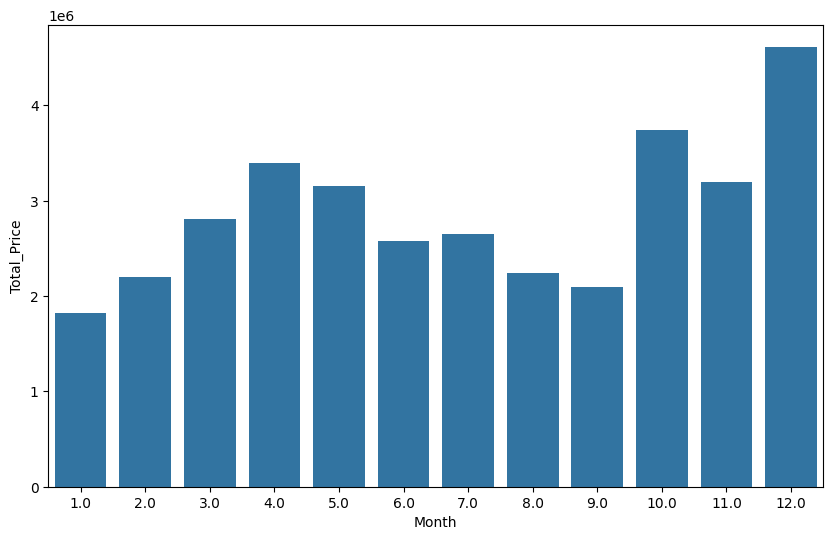

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(grouped_by_month_df,x="Month",y="Total_Price")
plt.show()


#### 2) Which city had the highest number of sales
To answer I...
- Grouped the data by city's and sorted by price
- Displayed the results as a visualisation for readability

In [17]:
# Create a grouped df, grouped by cities
grouped_by_city_df = no_na_df.groupby("City").agg(
    Number_Of_Orders=("Quantity Ordered","sum"),
    Total_Price=("Total Price","sum")
).reset_index()

In [18]:
# Order by total_price
sorted_citys = grouped_by_city_df.sort_values(by="Total_Price", ascending=False)

In [19]:
display(sorted_citys)

,City,Number_Of_Orders,Total_Price
7,San Francisco,50239.0,8262203.91
4,Los Angeles,33289.0,5452570.80
5,New York City,27932.0,4664317.43
2,Boston,22528.0,3661642.01
0,Atlanta,16602.0,2795498.58
3,Dallas,16730.0,2767975.40
8,Seattle,16553.0,2747755.48
6,Portland,14053.0,2320490.61
1,Austin,11153.0,1819581.75


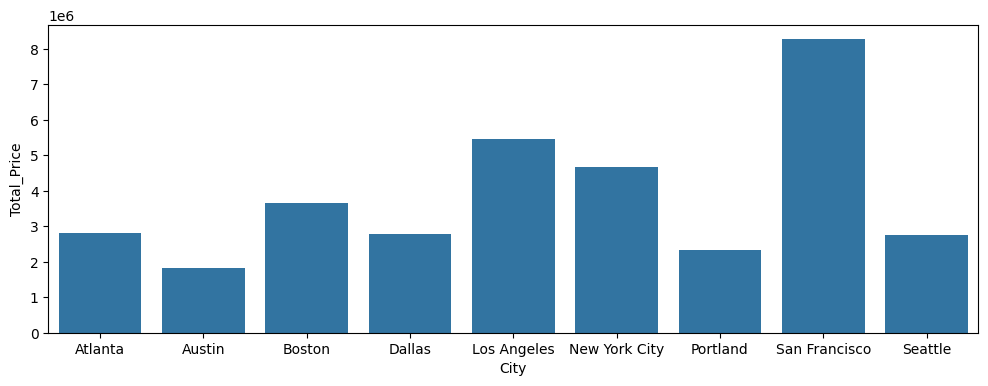

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(grouped_by_city_df,x="City",y="Total_Price")
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
To answer I...
- Grouped data
- Created a visual to show which hours had the most orders

In [21]:
no_na_df["Hour"] = no_na_df["Order Date"].dt.hour 

C:\Users\Josh\AppData\Local\Temp\ipykernel_9932\3774719787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_na_df["Hour"] = no_na_df["Order Date"].dt.hour


In [22]:
# Group by hour
grouped_by_hour_df = no_na_df.groupby("Hour").agg(
    Number_Of_Orders=("Quantity Ordered","sum"),
    Total_Price=("Total Price","sum")
).reset_index()

In [23]:
sorted_hours = grouped_by_hour_df.sort_values(by="Total_Price",ascending=False)

In [24]:
display(sorted_hours)

,Hour,Number_Of_Orders,Total_Price
19,19.0,14470.0,2412938.54
12,12.0,14202.0,2316821.34
11,11.0,14005.0,2300610.24
20,20.0,13768.0,2281716.24
18,18.0,13802.0,2219348.30
13,13.0,13685.0,2155389.80
17,17.0,12229.0,2129361.61
14,14.0,12362.0,2083672.73
21,21.0,12244.0,2042000.86
10,10.0,12308.0,1944286.77


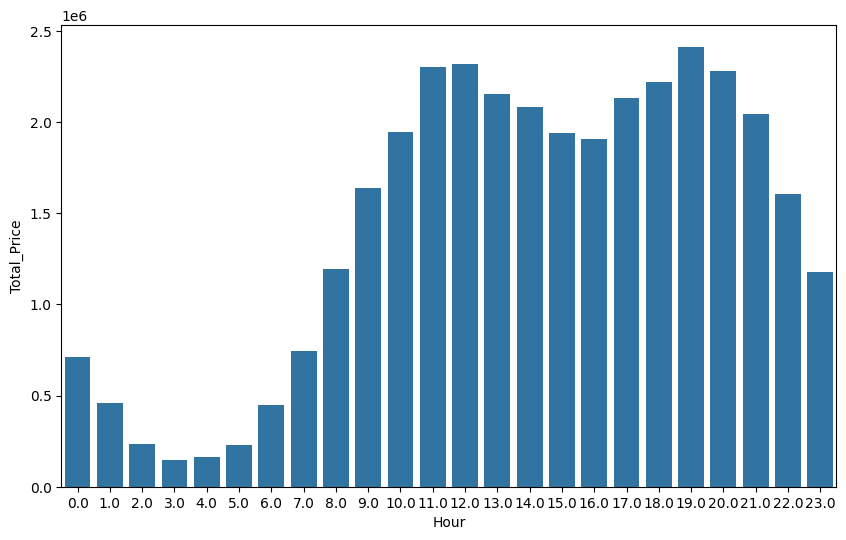

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(grouped_by_hour_df,x="Hour",y="Total_Price")
plt.show()

#### 4) What products are sold together the most (Pairs)
This question was the most challenging
To answer I...
- Kept all orders had the same order id. These were orders where multiple products where a part of an order, so they were ordered together.
- Created a "grouped" column that contained all items that were purchased in the same order.
- Dropped unique "order id" and "grouped" pairs
- Used counter and combinations to find the most common pairs.

In [26]:
from itertools import combinations
from collections import Counter

In [55]:
duplications_df = no_na_df[no_na_df["Order ID"].duplicated(keep=False)]
# Since keep is false we keep all dups.

In [28]:
duplications_df["Grouped"] = duplications_df.groupby(
    "Order ID")["Product"].transform(lambda x: ",".join(x))

C:\Users\Josh\AppData\Local\Temp\ipykernel_9932\1777392812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplications_df["Grouped"] = duplications_df.groupby(


In [29]:
duplications_df.head(1) # I succesfully created the grouped column

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Total Price,Hour,Grouped
3,176560,Google Phone,1.0,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4.0,600.0,14.0,"Google Phone,Wired Headphones"


In [30]:
duplications_df = duplications_df[["Order ID","Grouped"]].drop_duplicates() # default is first for drop duplicates which is fine.

In [31]:
display(duplications_df)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [32]:
count = Counter()

for row in duplications_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

count.most_common(11)[1:]


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

These are the most common pairs of products.
A top 4 are a phone and its corresponding charging cable, followed by wired headphones.
Phone accesecories with phones are the most popular pairs of products sold together.

#### What product produced the most revenue, why?
To answer I...
- Grouped products and used aggregate functions
- I turned the results into a visualation for readability
- I discovered the products that produced the revenue had a high cost, this could be the "why".

In [33]:
# Group by products
grouped_by_products_df = no_na_df.groupby("Product").agg(
    Number_Of_Orders=("Quantity Ordered","sum"),
    Total_Price=("Total Price","sum")
).reset_index()

In [34]:
sorted_products = grouped_by_products_df.sort_values(by="Total_Price",ascending=False)

In [35]:
top_10_products = sorted_products.head(5)
top_10_products

,Product,Number_Of_Orders,Total_Price
13,Macbook Pro Laptop,4728.0,8037600.00
19,iPhone,6849.0,4794300.00
15,ThinkPad Laptop,4130.0,4129958.70
9,Google Phone,5532.0,3319200.00
1,27in 4K Gaming Monitor,6244.0,2435097.56


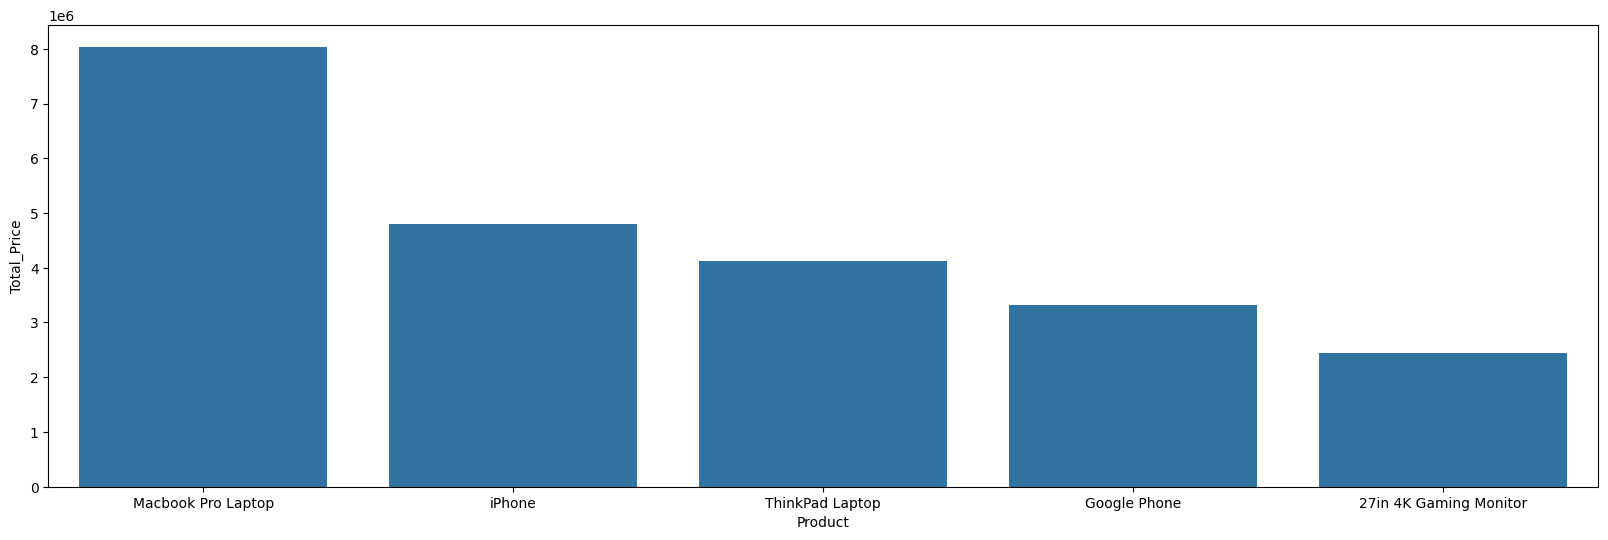

In [36]:
plt.figure(figsize=(20,6))
sns.barplot(top_10_products,x="Product",y="Total_Price")
plt.show()

The products the made the biggest revenue were all expensive. With the exception of the gaming monitor which was 390.
Macbook pro and had the most total revenue made by far. It had a price of 1700 putting it far ahead of the others.

In [37]:
# Extract the product names from top_10_products
top_10_product_names = top_10_products['Product']

# Filter the original dataframe based on the product names
orignal_top_10_products = no_na_df[no_na_df['Product'].isin(top_10_product_names)]

# Drop duplicate prices for the same product, keeping only unique product-price combinations
unique_prices_df = orignal_top_10_products[['Product', 'Price Each']].drop_duplicates()

# Display the original prices of the top products
print(unique_prices_df[['Product', 'Price Each']])

                   Product  Price Each
3             Google Phone      600.00
9       Macbook Pro Laptop     1700.00
13  27in 4K Gaming Monitor      389.99
26                  iPhone      700.00
80         ThinkPad Laptop      999.99
